In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler,RobustScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor

In [5]:
df=pd.read_csv("C:\\Users\\USER\\DA\\Data Sets\\PROJECT DATASETS\\standard_populations_19_age_groups.csv")
df

,age_group,1940 U.S. Std Million,1950 U.S. Std Million,1960 U.S. Std Million,1970 U.S. Std Million,1980 U.S. Std Million,1990 U.S. Std Million,1991 Canadian Std Million,1996 Canadian Std Million,2000 U.S. Std Million,2000 U.S. Std Population (Census P25-1130),2011 Canadian Standard Population,European (EU-27 plus EFTA 2011-2030) Std Million,European (Scandinavian 1960) Std Million,World (Segi 1960) Std Million,World (WHO 2000-2025) Std Million,Standard population OECD
0,0,15343,20882,22930,17151,15598,12936,14334,12342,13818,3794901,376321,10000,16000,24000,17917,1624
1,01-04,64718,86376,90390,67265,56565,60863,55131,53893,55317,15191619,1522743,40000,64000,96000,70652,6322
2,05-09,81147,87591,104235,98204,73716,72772,69454,67985,72533,19919840,1810433,55000,70000,100000,86870,8089
3,10-14,89208,73785,93538,102304,80523,68812,68034,67716,73032,20056779,1918164,55000,70000,90000,85970,8304
4,15-19,93670,70450,73717,93845,93439,71384,68495,67841,72169,19819518,2238952,55000,70000,90000,84670,8560
5,20-24,88007,76191,60231,80561,94103,76476,75016,67761,66478,18257225,2354354,60000,70000,80000,82171,8200
6,25-29,84277,81237,60612,66320,86168,85694,89944,72914,64529,17722067,2369841,60000,70000,80000,79272,7813
7,30-34,77789,76425,66635,56249,77516,87905,92400,87030,71044,19511370,2327955,65000,70000,60000,76073,7625
8,35-39,72495,74629,69601,54656,61644,80267,83388,88510,80762,22179956,2273087,70000,70000,60000,71475,6307
9,40-44,66742,67712,64689,58958,51510,70829,76063,80055,81851,22479229,2385918,70000,70000,60000,65877,5831


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 17 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   age_group                                         19 non-null     object
 1   1940 U.S. Std Million                             19 non-null     int64 
 2   1950 U.S. Std Million                             19 non-null     int64 
 3   1960 U.S. Std Million                             19 non-null     int64 
 4   1970 U.S. Std Million                             19 non-null     int64 
 5   1980 U.S. Std Million                             19 non-null     int64 
 6   1990 U.S. Std Million                             19 non-null     int64 
 7   1991 Canadian Std Million                         19 non-null     int64 
 8   1996 Canadian Std Million                         19 non-null     int64 
 9   2000 U.S. Std Million             

## General informations:

#### All populations with 'Million' in their name sum up to a total population of 1 million people.
#### All provided standard populations assume an equal proportion of men an women.


##  Plots of the standard populations with 19 age groups

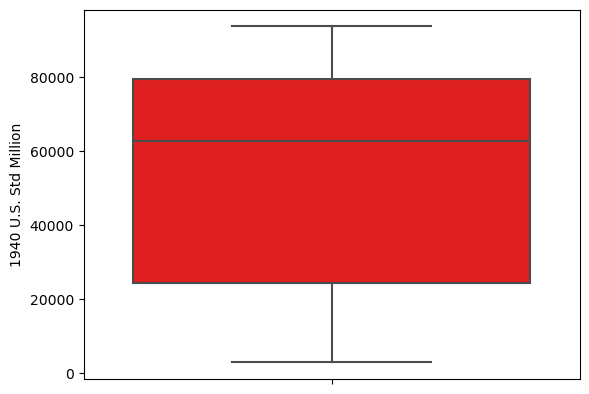

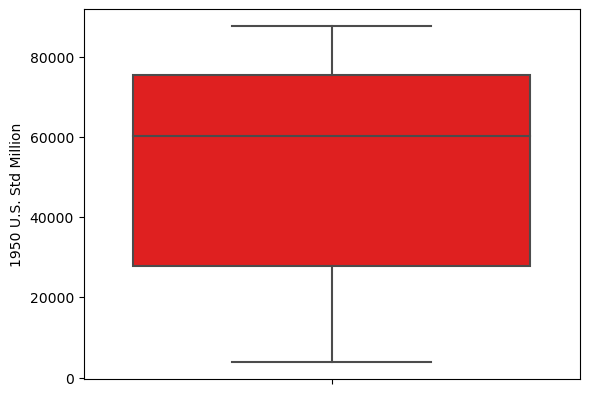

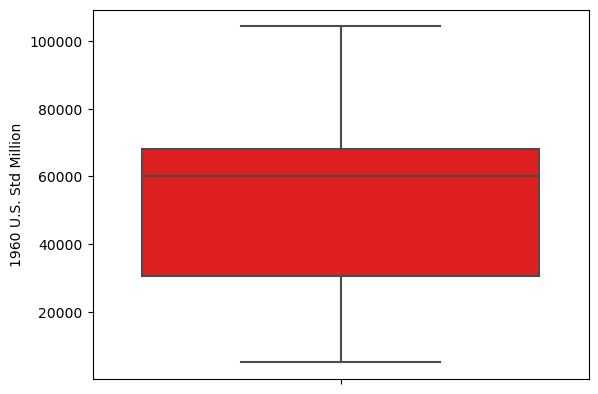

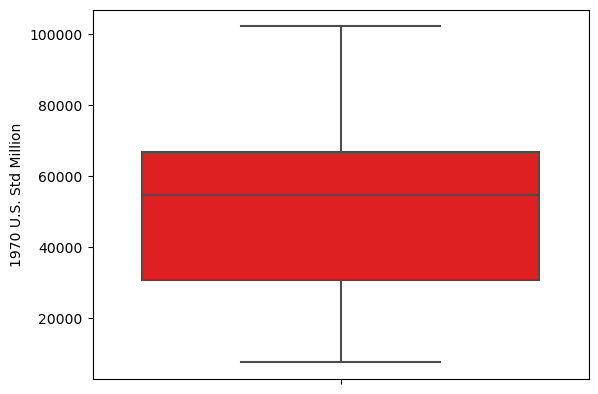

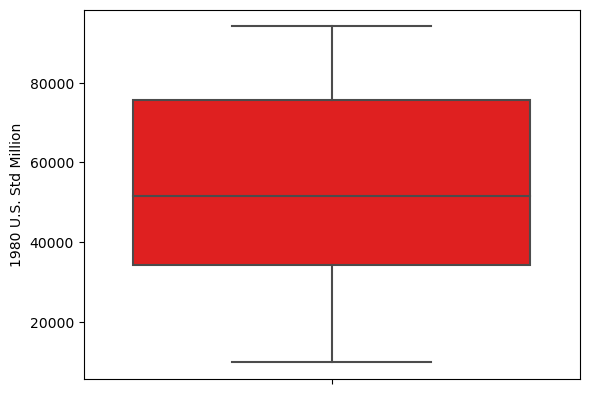

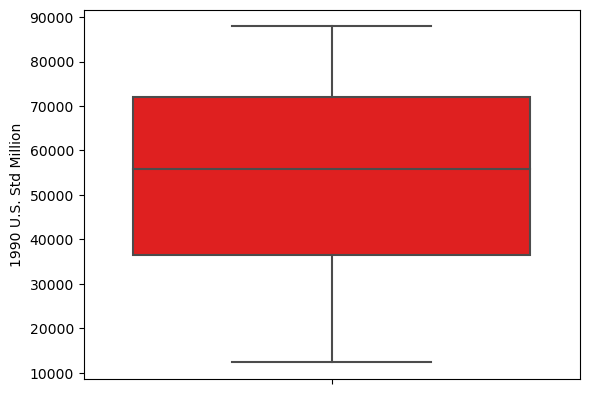

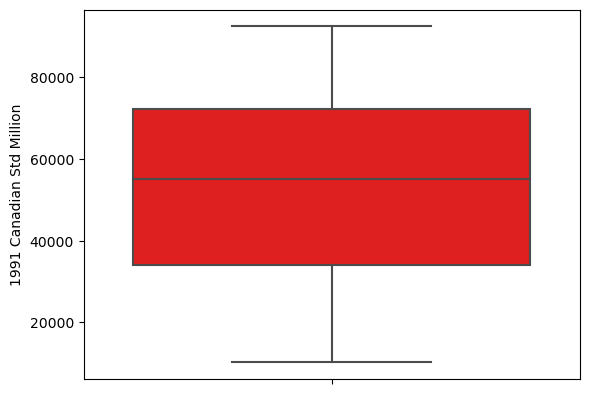

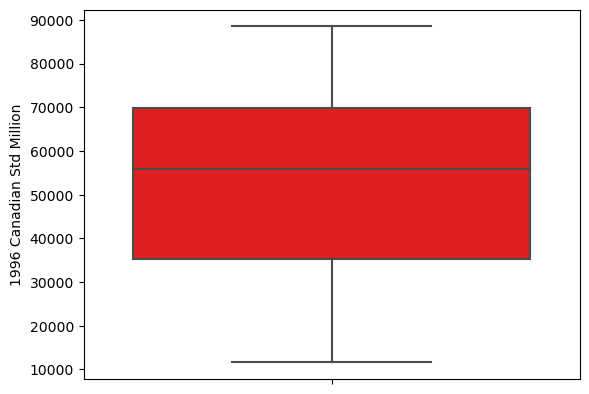

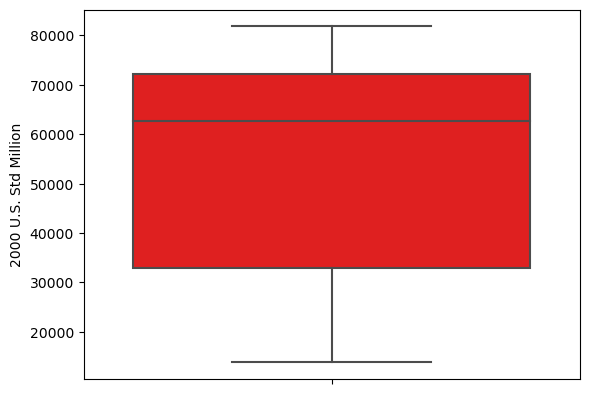

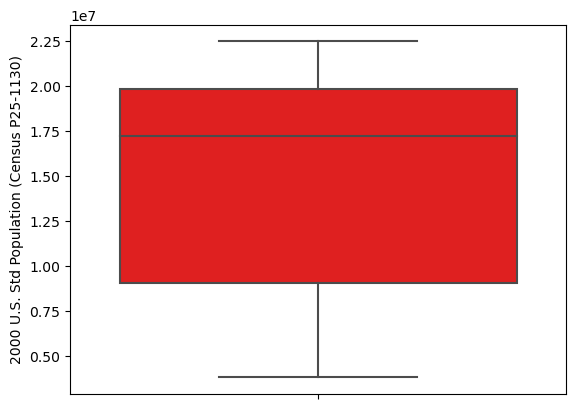

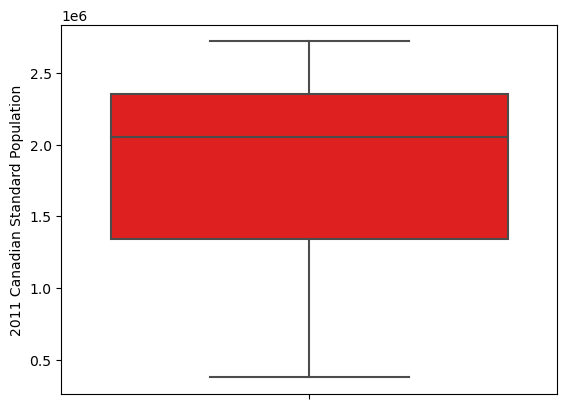

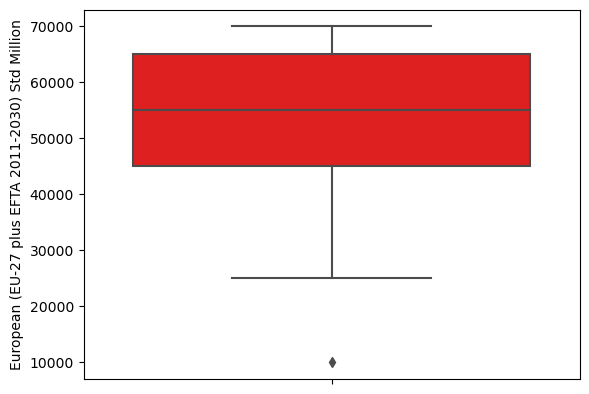

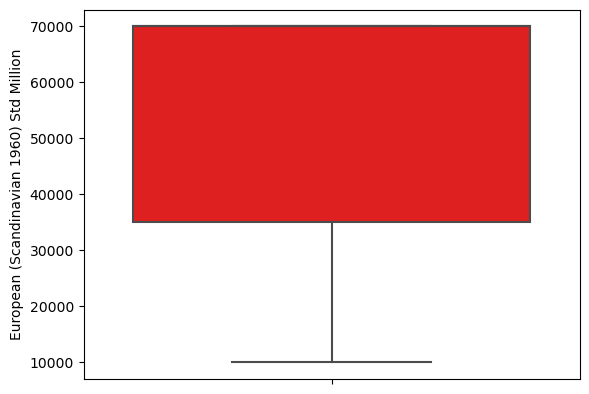

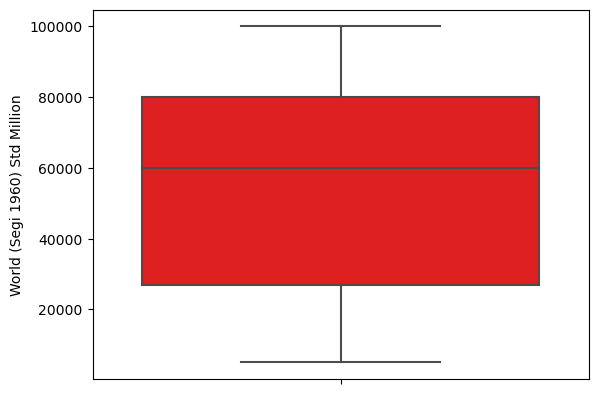

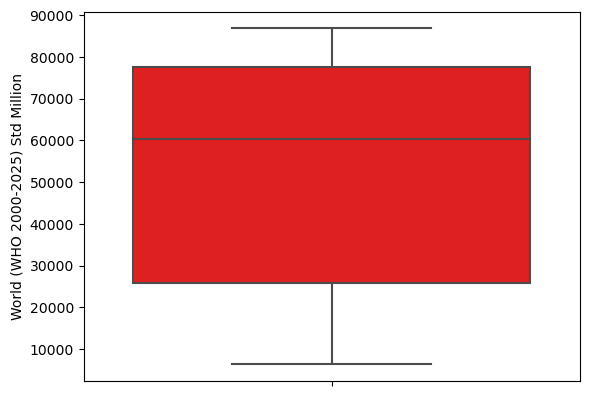

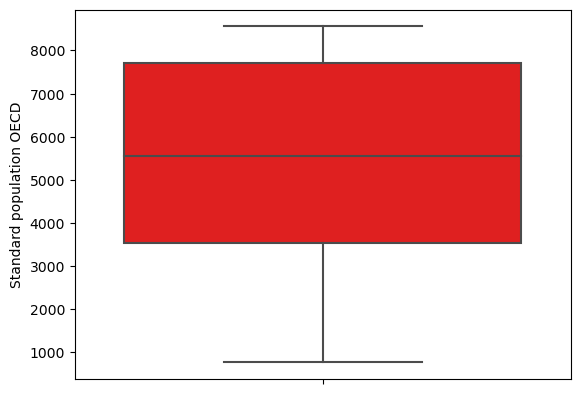

In [4]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="red")
        plt.show()

In [5]:
le=LabelEncoder()

In [6]:
df["age_group"]=le.fit_transform(df["age_group"])

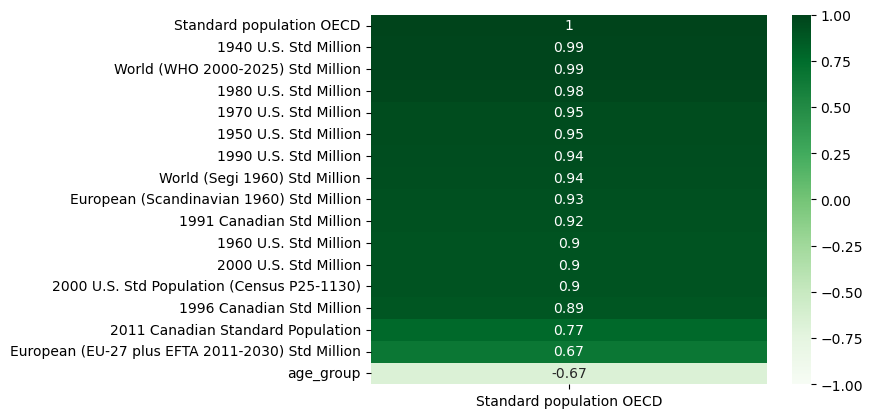

In [7]:
sns.heatmap(df.corr()[["Standard population OECD"]].sort_values(by="Standard population OECD", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Greens");

In [14]:
x=df.iloc [:,1:16].values
y=df[["Standard population OECD"]].values

In [16]:
sc=StandardScaler()

In [17]:
x=sc.fit_transform(x)

In [18]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "KNeighborsRegressor":KNeighborsRegressor()
}

In [19]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  3120.9613890475307
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  388.61512346234997
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  336.9984537472045
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  841.1055801608006
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  384.7765592433642
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  587.7159337939785
**************************************************

In [20]:
r=Ridge()

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
r.fit(x_train, y_train)

Ridge()

In [23]:
print("model trained with {}".format(r))
training_score = r.score(x_train, y_train)*100
testing_score = r.score(x_test, y_test)*100
score = r2_score(y_test, r.predict(x_test))*100
mae = mean_absolute_error(y_test, r.predict(x_test))
mse = mean_squared_error(y_test, r.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with Ridge()
r2score:  97.83623058923867
training_score:  99.30967150375882
testing_score:  97.83623058923867
mae:  317.08006935111416
mse:  115914.30117938956
rmse_test:  340.46189387270573


In [25]:
y_pred = r.predict(x)

In [26]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,1624.0,1777.306260
1,6322.0,6494.121955
2,8089.0,8106.301277
3,8304.0,8225.488977
4,8560.0,8381.026188
5,8200.0,8136.882004
6,7813.0,7846.706676
7,7625.0,7419.974017
8,6307.0,6821.787137
9,5831.0,6300.318449


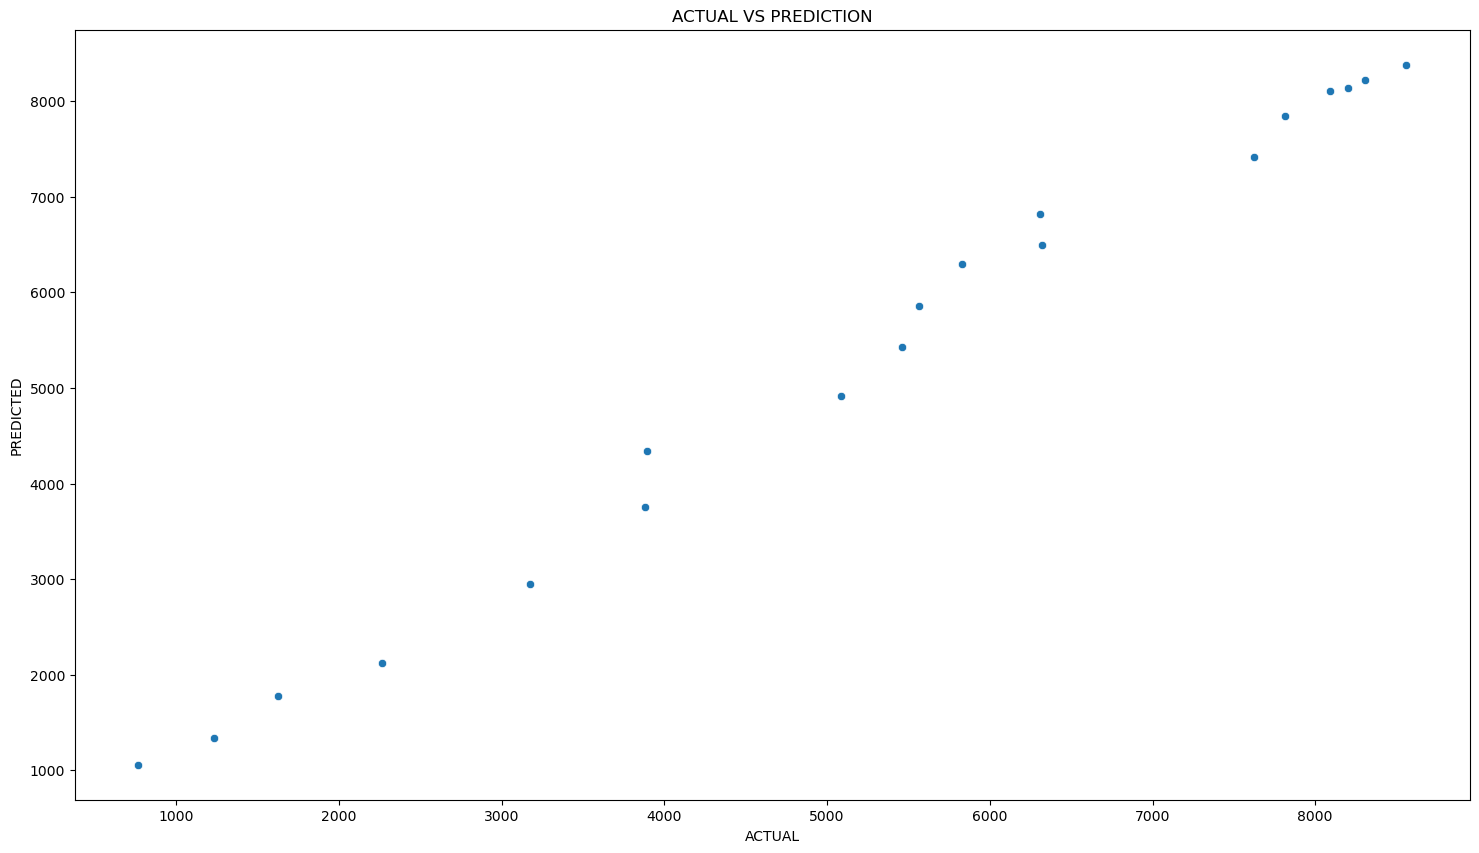

In [27]:
plt.figure(figsize=(18,10))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()